<a href="https://colab.research.google.com/github/Suvraneel/fcc-machine-learning-with-python/blob/fcc-practice/practice/stockDelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [27]:
s = "/content/drive/MyDrive/nse_data_legacy.csv"
dataset_train = pd.read_csv(s)
training_set = dataset_train.iloc[:, 1:2].values

In [32]:
print(dataset_train.shape)
dataset_train.head()

(2035, 8)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [34]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Building the LSTM  
In order to build the LSTM, we need to import a couple of modules from Keras:

    Sequential for initializing the neural network
    Dense for adding a densely connected neural network layer
    LSTM for adding the Long Short-Term Memory layer
    Dropout for adding dropout layers that prevent overfitting 

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [39]:

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 5, batch_size = 32) # epoch = 100

Epoch 1/5
62/62 [==============================] - 12s 108ms/step - loss: 0.0079
Epoch 2/5
62/62 [==============================] - 7s 108ms/step - loss: 0.0034
Epoch 3/5
62/62 [==============================] - 7s 108ms/step - loss: 0.0029
Epoch 4/5
62/62 [==============================] - 7s 107ms/step - loss: 0.0025
Epoch 5/5
62/62 [==============================] - 7s 107ms/step - loss: 0.0029


In [40]:
# test set
dataset_test = pd.read_csv('/content/drive/MyDrive/testdata.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [41]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

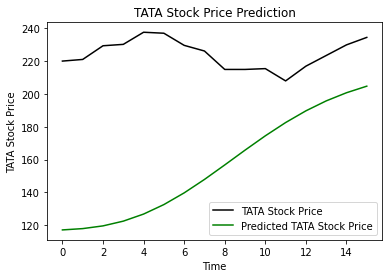

In [42]:
# Plot results
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()